# run staNMF

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from staNMF import staNMF
from staNMF.nmf_models import sklearn_nmf
import pickle
import networkx as nx

In [3]:
font = {'family' : 'normal',
'weight' : 'regular',
'size'   : 18}
plt.rc('font', **font)

In [4]:
#load_data
tmp = np.load('../data/imputed_data_kNN_neighbor_6_weights_distance.npz')
data = tmp['imputed']
selected = tmp['selected']
original_shape = data.shape

In [5]:
#load reference atlas
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')

In [6]:
# preprocess compute the support
support = np.sum(areas_atlas, 0) > 0

Text(1,3,'support')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


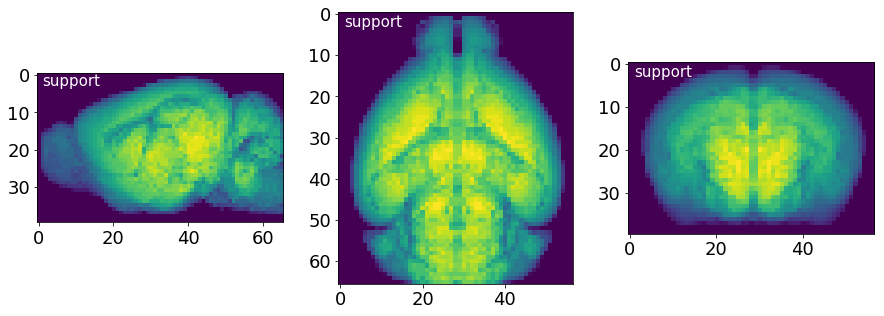

In [7]:
#visualize the support
_, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
a.imshow(np.mean(support[:, :, :], 2).T)
b.imshow(np.mean(support[:, :, :], 1))
c.imshow(np.mean(support[:, :, :], 0))
a.text(1, 3, 'support', color='w', fontsize=15)
b.text(1, 3, 'support', color='w', fontsize=15)
c.text(1, 3, 'support', color='w', fontsize=15)

In [8]:
# preprocess : get the data within the reference atlas
filtered_data = data[:,:-1,:-1,:-1][:, support]
filtered_data.shape

(4345, 55954)

In [62]:
stanmf = staNMF(K1=8,
                K2=25,
                X=np.maximum(filtered_data,0),
                folderID='Mar17',
                chunksize=2,
                parallel=True,
                processes=30,
                replicates=100,
                seed=1234)

In [63]:
stanmf.runNMF(sklearn_nmf(bootstrap=True, init="nndsvd", solver='mu', max_iter=1000))

Working on K = 8...
Working on K = 9...
Working on K = 10...
Working on K = 11...
Working on K = 12...
Working on K = 13...
Working on K = 14...
Working on K = 15...
Working on K = 16...
Working on K = 17...
Working on K = 18...
Working on K = 19...
Working on K = 20...
Working on K = 21...
Working on K = 22...
Working on K = 23...
Working on K = 24...
Working on K = 25...


In [64]:
stanmf.instability('sklearn_nmf')

Calculating instability for 8
Calculating instability for 9
Calculating instability for 10
Calculating instability for 11
Calculating instability for 12
Calculating instability for 13
Calculating instability for 14
Calculating instability for 15
Calculating instability for 16
Calculating instability for 17
Calculating instability for 18
Calculating instability for 19
Calculating instability for 20
Calculating instability for 21
Calculating instability for 22
Calculating instability for 23
Calculating instability for 24
Calculating instability for 25


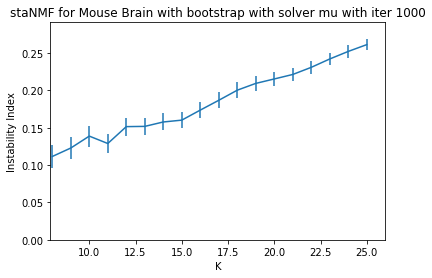

In [149]:
stanmf.plot(dataset_title="staNMF for Mouse Brain with bootstrap with solver mu with iter 1000")

In [34]:
nmf = sklearn_nmf(n_components=13, l1_ratio=1, alpha = 0)
nmf.fit(np.maximum(filtered_data,0))

sklearn_nmf(alpha=0, beta_loss='frobenius', bootstrap=False, init=None,
            l1_ratio=1, max_iter=200, n_components=13, random_state=None,
            shuffle=False, solver='cd', tol=0.0001, verbose=0)

In [724]:
# save
#with open("nmf_model_final.pickle", 'wb') as f:
#    pickle.dump(nmf, f)

In [9]:
# load
with open("nmf_model_final.pickle", 'rb') as f:
    nmf = pickle.load(f)

In [10]:
PPs = nmf.components_

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


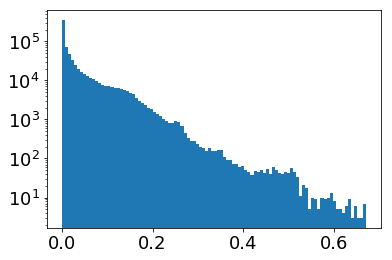

In [11]:
plt.hist(PPs.flatten(), bins=100)
plt.yscale('log')
plt.show()

In [28]:
#from joblib import load
#f = load('./staNMFDicts_Mar17/K=13/nmf_model_sklearn_nmf_0.joblib')
#PPs = f.components_


In [12]:
# preprocess unmask
PPs_3d = np.zeros((13, 66, 40, 57))
PPs_3d[:,support] = PPs * (PPs > 0.05)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


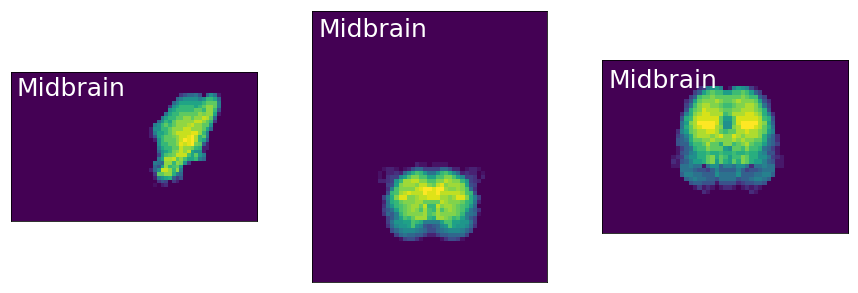

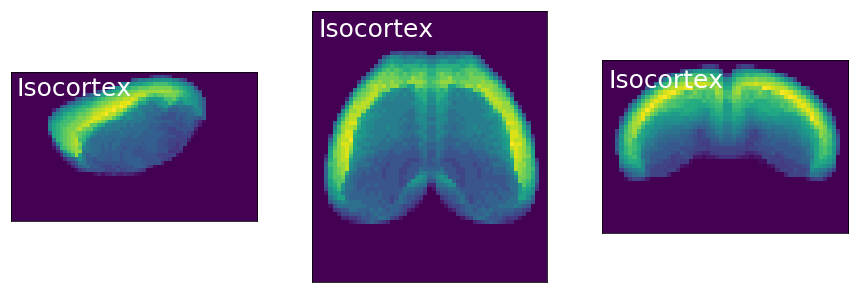

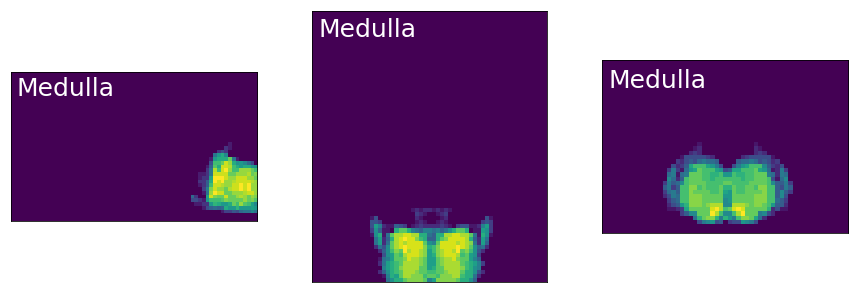

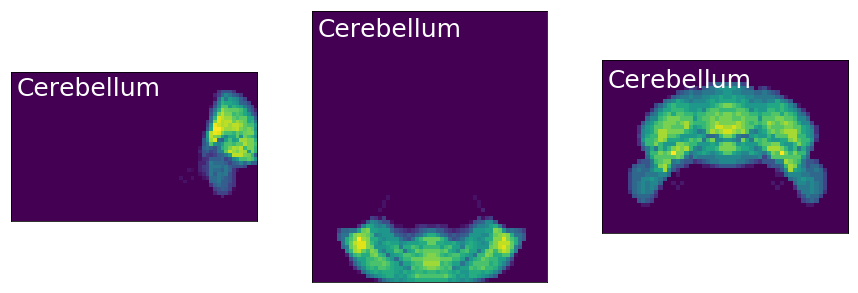

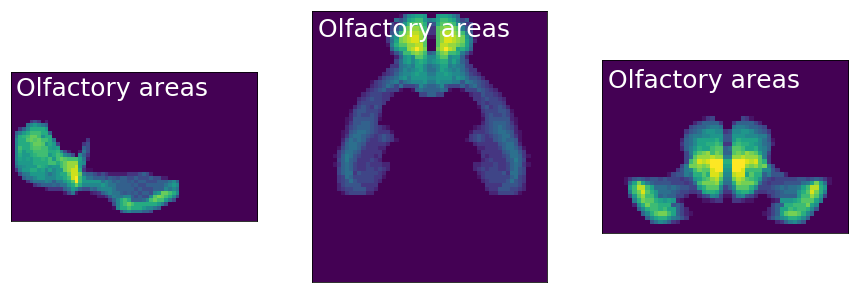

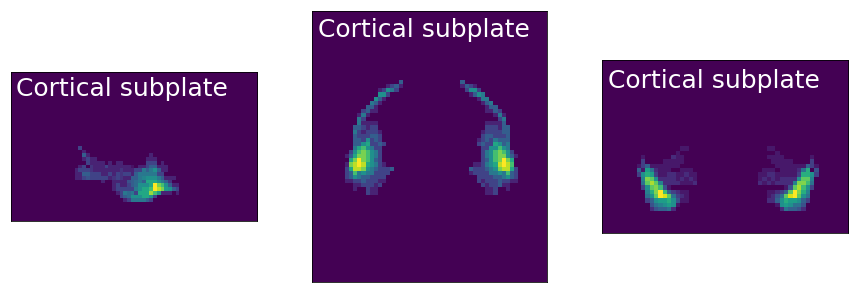

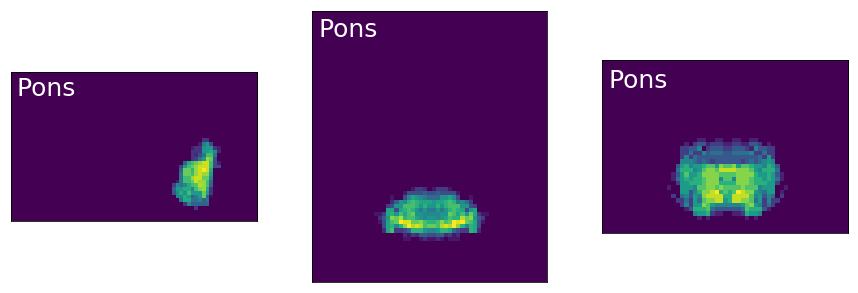

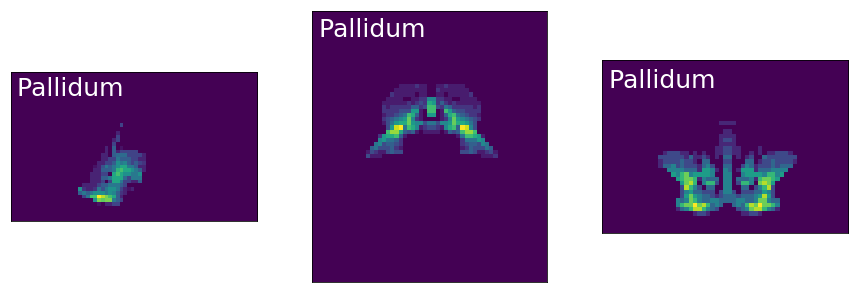

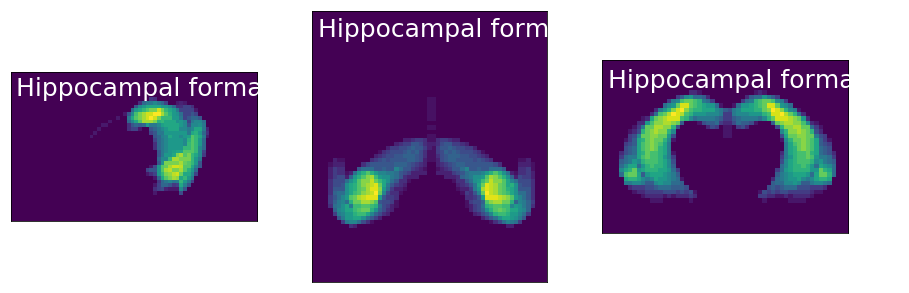

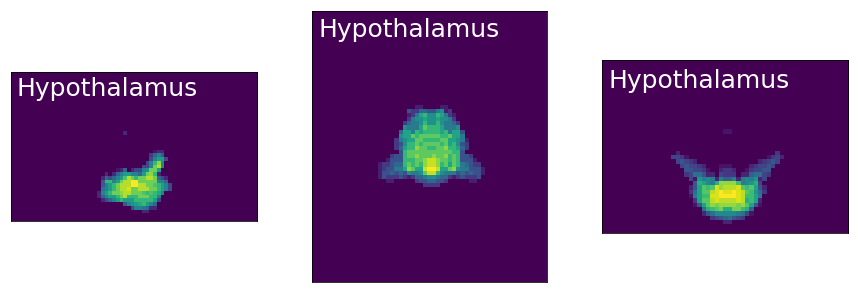

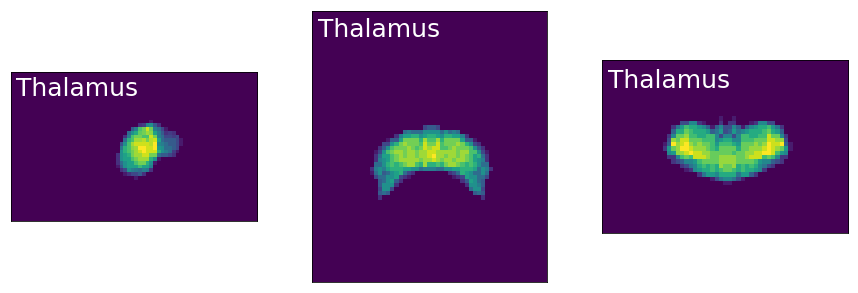

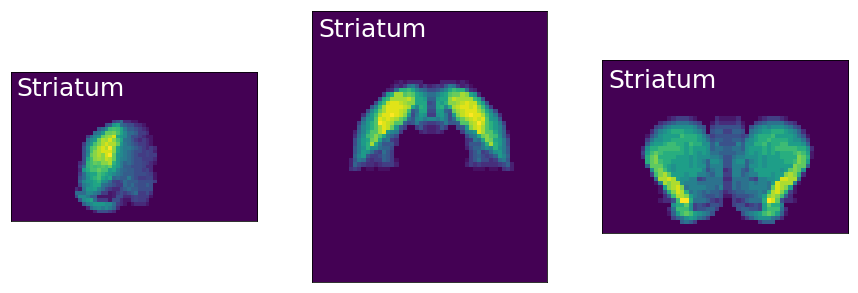

In [13]:
#visualize the PPs
    # load ABA CCF coarse
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')
            
for i in range(12):
    _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
    a.imshow(np.mean(areas_atlas[i, :, :, :], 2).T)
    b.imshow(np.mean(areas_atlas[i, :, :, :], 1))
    c.imshow(np.mean(areas_atlas[i, :, :, :], 0))
    a.text(1, 6, mouse_coarse_df.iloc[i]['name'], color='w', fontsize=25)
    b.text(1, 6, mouse_coarse_df.iloc[i]['name'], color='w', fontsize=25)
    c.text(1, 6, mouse_coarse_df.iloc[i]['name'], color='w', fontsize=25)
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)
    c.axes.get_xaxis().set_visible(False)
    c.axes.get_yaxis().set_visible(False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


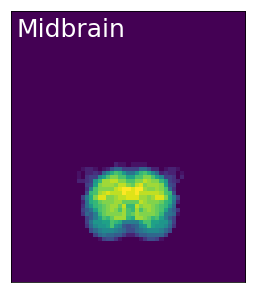

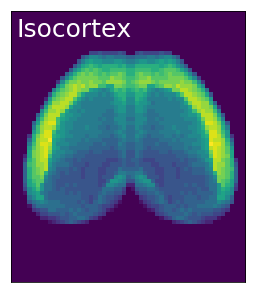

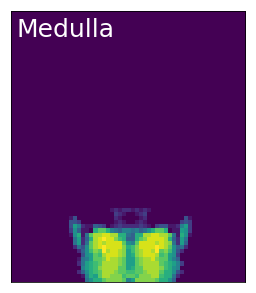

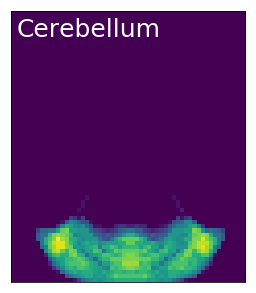

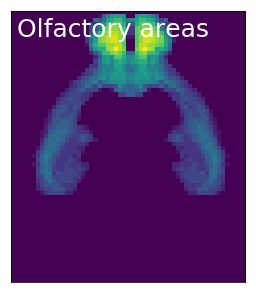

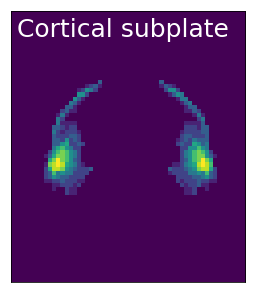

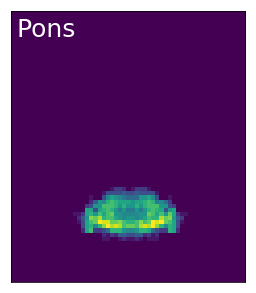

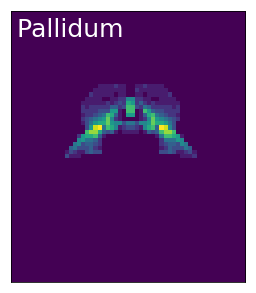

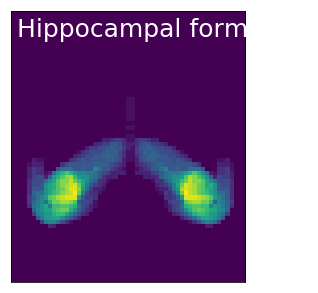

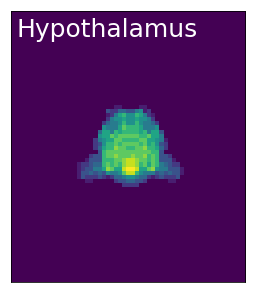

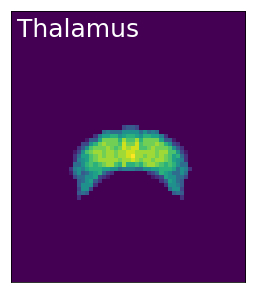

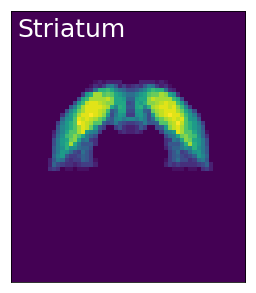

In [82]:
#visualize the PPs
    # load ABA CCF coarse
areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
mouse_coarse_df = pd.read_pickle('mouse_coarse_df')
            
for i in range(12):
    _, (b) = plt.subplots(1, 1, figsize=(5, 5))
    b.imshow(np.mean(areas_atlas[i, :, :, :], 1))
    b.text(1, 6, mouse_coarse_df.iloc[i]['name'], color='w', fontsize=25)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


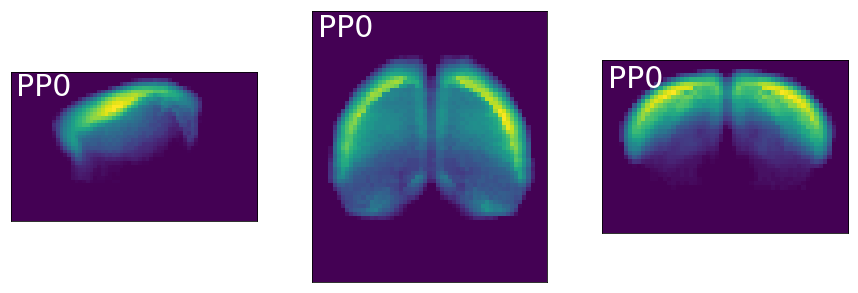

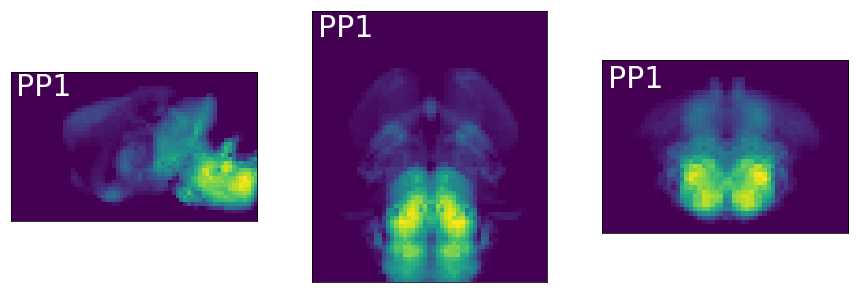

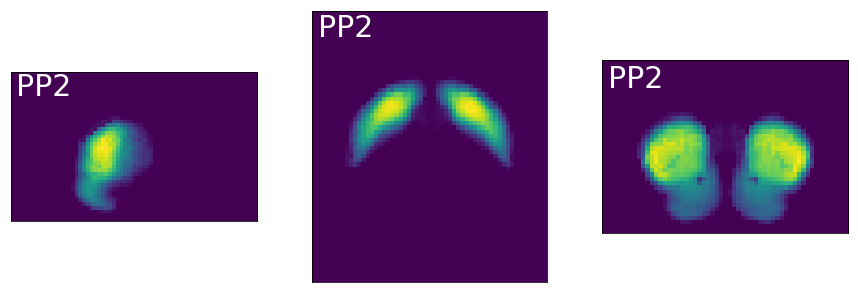

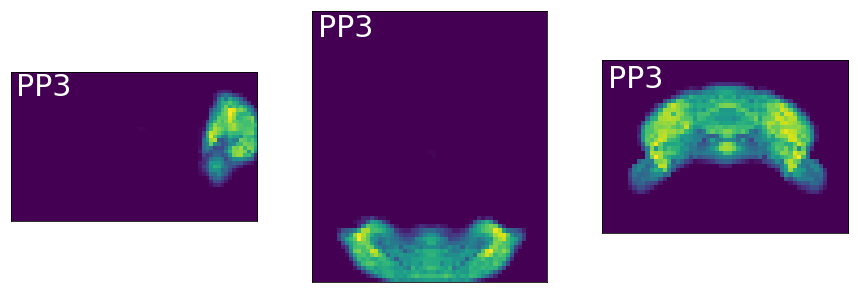

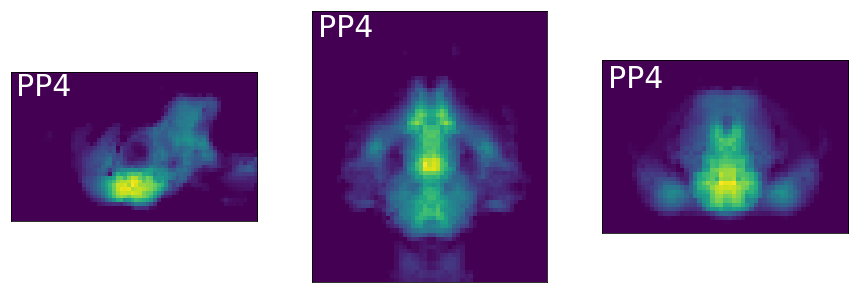

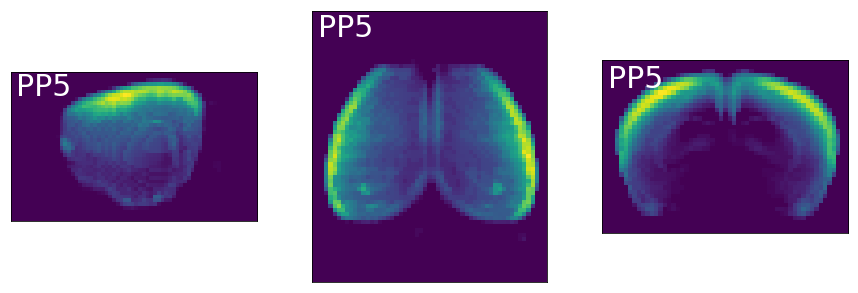

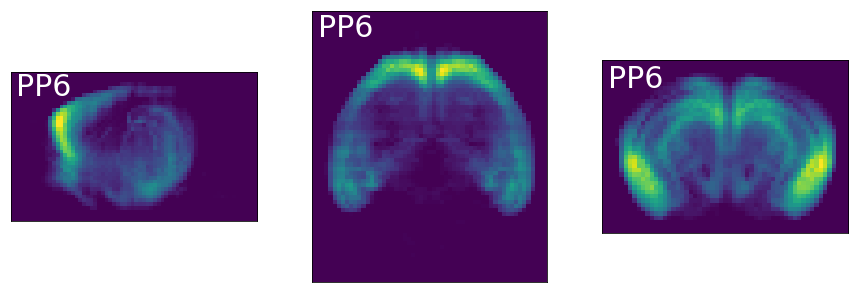

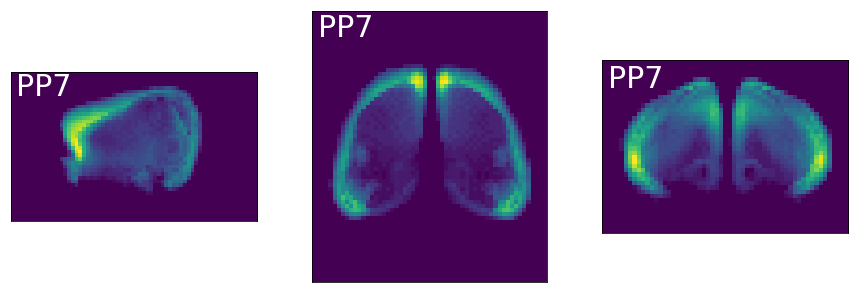

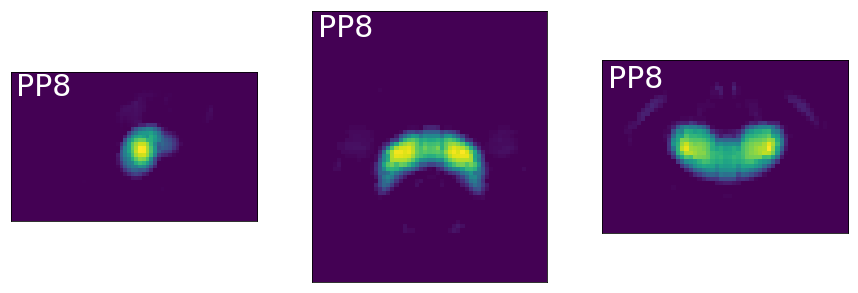

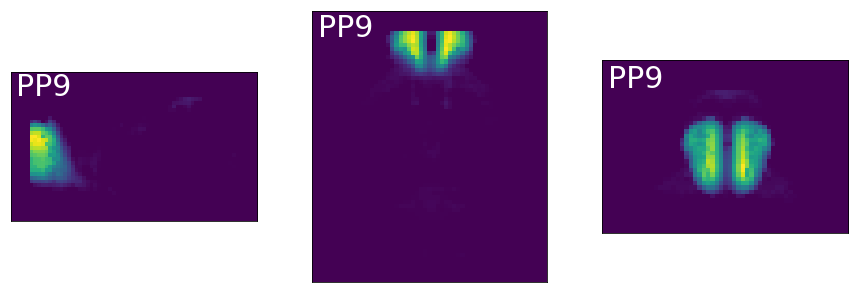

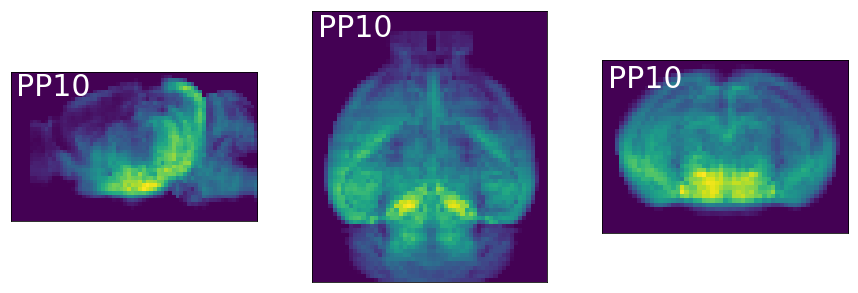

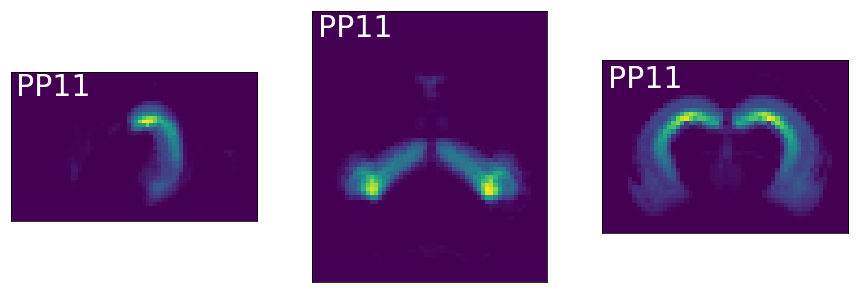

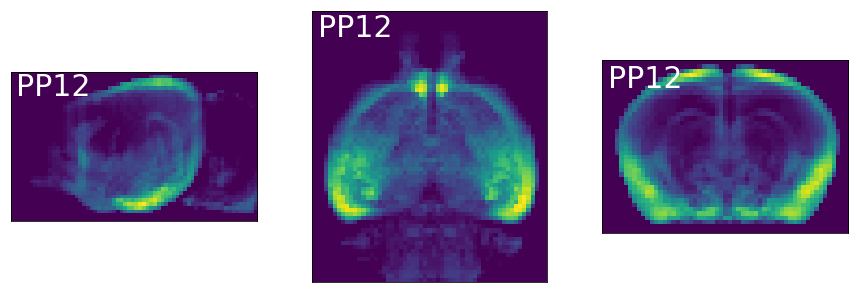

In [14]:
#visualize the PPs
for i in range(13):
    _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
    a.imshow(np.mean(PPs_3d[i, :, :, :], 2).T)
    b.imshow(np.mean(PPs_3d[i, :, :, :], 1))
    c.imshow(np.mean(PPs_3d[i, :, :, :], 0))
    a.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
    b.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
    c.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)
    c.axes.get_xaxis().set_visible(False)
    c.axes.get_yaxis().set_visible(False)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


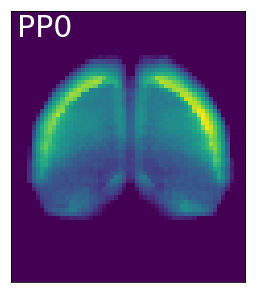

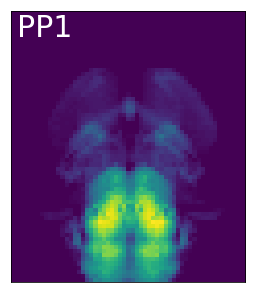

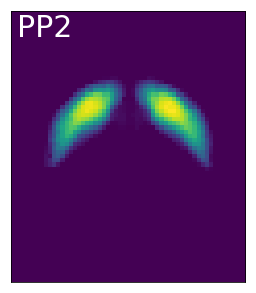

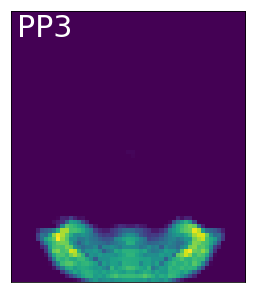

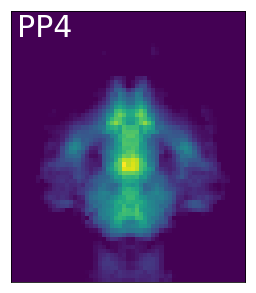

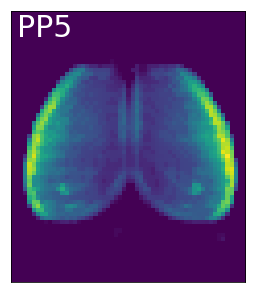

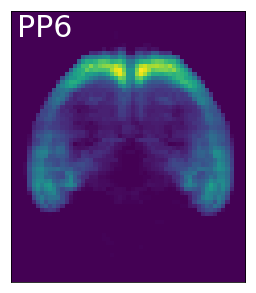

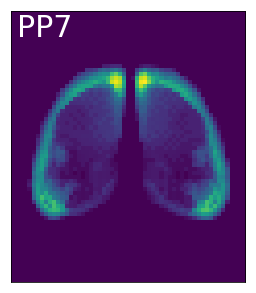

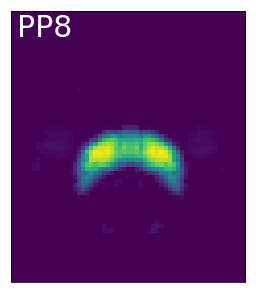

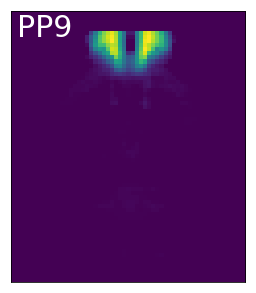

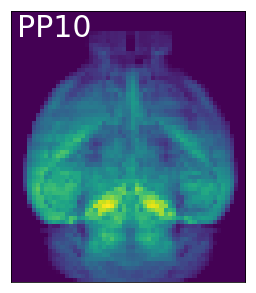

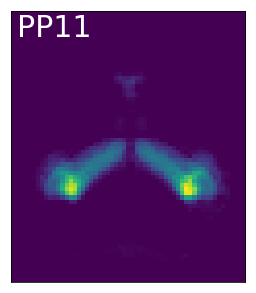

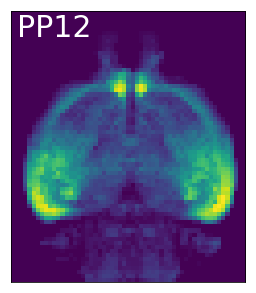

In [15]:
#visualize the PPs
for i in range(13):
    _, (b) = plt.subplots(1, 1, figsize=(5, 5))
    b.imshow(np.mean(PPs_3d[i, :, :, :], 1))
    b.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)

In [82]:
from utils import correlation_map_with_CCF

In [30]:
def correlation_map_with_CCF(PPs, original_shape, plot=True, order_type = 1, area_order=None, put_last_k = 0, save_fig = False, save_index = None):
    ''' Compare PPs with the standard ABA CCF.
    '''
    # transform PPs to 4d tensor
    PPs_3d = np.zeros([PPs.shape[0]] + original_shape[1:].tolist())
    num_pps = PPs.shape[0]
    for i in range(PPs.shape[0]):
        p2 = np.reshape(PPs[i,:], original_shape[1:])
        PPs_3d[i,:,:,:] = p2
    # load ABA CCF coarse
    areas_atlas = np.load('mouse_coarse_structure_atlas.npy')
    mouse_coarse_df = pd.read_pickle('mouse_coarse_df')
    if area_order != None:
        cor_mat = np.corrcoef(np.vstack([areas_atlas.reshape(12, -1)[np.array(area_order)], PPs_3d.reshape(num_pps,-1)]))[:areas_atlas.shape[0], areas_atlas.shape[0]:]
    else:
        cor_mat = np.corrcoef(np.vstack([areas_atlas.reshape(12, -1), PPs_3d.reshape(num_pps,-1)]))[:areas_atlas.shape[0], areas_atlas.shape[0]:]
    
    if order_type == 1:
        rows, cols = linear_sum_assignment(-np.abs(cor_mat))
        factor_order = list(cols) + [x for x in range(num_pps) if x not in cols]
    elif order_type == 2:
        cols = np.argmax(np.abs(cor_mat), 0)
        if put_last_k > 0:
            # put the poorly fitted patterns at the last.
            best_fits = [abs(cor_mat[y, x]) for x, y in enumerate(cols)]
            orders = np.argsort(best_fits)
            for i in range(put_last_k):
                cols[orders[i]] = max(cols) 
        factor_order = np.argsort([ 10 * x - abs(cor_mat[x, i]) for i, x in enumerate(cols.tolist())]) # first sort by x, then sort by the value
                
            
    if plot:
        fig = plt.gcf()
        plt.figure(figsize=(10,9))
        plt.imshow(np.abs(cor_mat[:,factor_order]).tolist())
        if area_order is None:
            plt.yticks(np.arange(12),(mouse_coarse_df.iloc[:]['name'].tolist()))
        else:
            plt.yticks(np.arange(12),(mouse_coarse_df.iloc[area_order]['name'].tolist()))
        plt.ylim([-0.5, 11.5])
        plt.gca().invert_yaxis()
        plt.xticks(range(num_pps), factor_order)
        plt.title('Correlation Coefficient')
        plt.xlabel('Principle Patterns')
        plt.colorbar()
        plt.show()
        if save_fig:
            fig.savefig('plot_{}.png'.format(save_index))
    return np.abs(cor_mat[:,factor_order])

<Figure size 432x288 with 0 Axes>

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


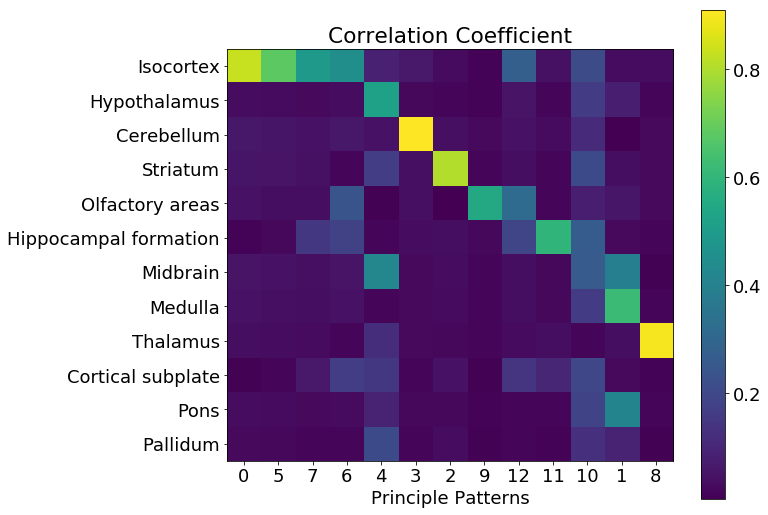

In [31]:
corr_mat = correlation_map_with_CCF(PPs_3d.reshape((PPs_3d.shape[0], 66 * 40 * 57)), np.array(PPs_3d.shape), order_type=2,area_order=[1,9,3,11,4,8,0,2,10,5,6,7], put_last_k=0)

In [104]:
#define_function a function that shows two genes together
def visualize_two_genes(geneA, geneB, colorA = 'red', colorB = 'green', missing_mask = True):    
    geneA = np.maximum(geneA, 0)
    geneB = np.maximum(geneB, 0)
    color_map = {'red':0, 'green':1, 'blue':2}
    colorA = color_map[colorA]
    colorB = color_map[colorB]
    
    if missing_mask:
        geneA = geneA > 0
        geneB = geneB > 0
        

    _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
    
    x_dim, y_dim, z_dim = geneA.shape
    out1 = np.zeros((y_dim, z_dim, 3))
    out1[:,:,colorA] = np.sum(geneA, 0)
    out1[:,:,colorA] /= np.max(out1[:,:,colorA])
    out1[:,:,colorB] = np.sum(geneB, 0)
    out1[:,:,colorB] /= np.max(out1[:,:,colorB])
    out1 
    c.imshow(out1)
    #plt.colorbar()
    
    out2 = np.zeros((x_dim, z_dim, 3))
    out2[:,:,colorA] = np.sum(geneA, 1)
    out2[:,:,colorA] /= np.max(out2[:,:,colorA])
    out2[:,:,colorB] = np.sum(geneB, 1)
    out2[:,:,colorB] /= np.max(out2[:,:,colorB])
    
    b.imshow(out2)
    #plt.colorbar()
    
    plt.figure()
    
    out3 = np.zeros((y_dim, x_dim, 3))
    out3[:,:,colorA] = np.sum(geneA, 2).T
    out3[:,:,colorA] /= np.max(out3[:,:,colorA])
    out3[:,:,colorB] = np.sum(geneB, 2).T
    out3[:,:,colorB] /= np.max(out3[:,:,colorB])
    
    a.imshow(out3)
    
#     a.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
#     b.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
#     c.text(1, 6, 'PP{}'.format(i), color='w', fontsize=30)
    
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)
    c.axes.get_xaxis().set_visible(False)
    c.axes.get_yaxis().set_visible(False)
    
    plt.show()

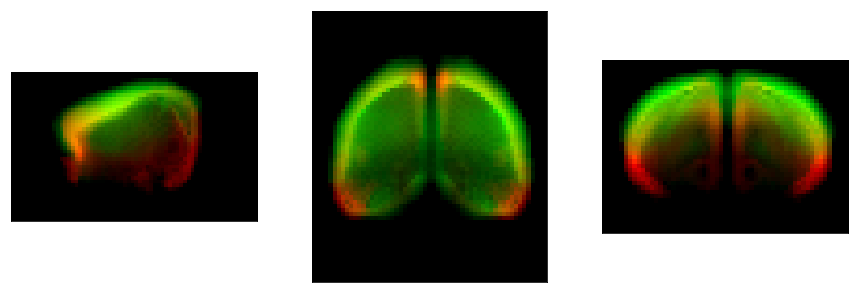

<Figure size 432x288 with 0 Axes>

In [105]:
visualize_two_genes(PPs_3d[7],PPs_3d[0], missing_mask=False)

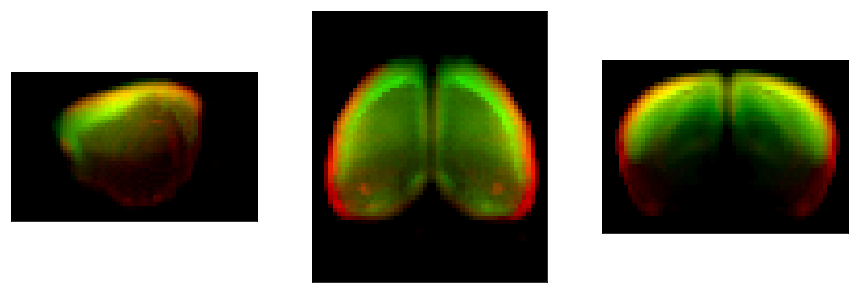

<Figure size 432x288 with 0 Axes>

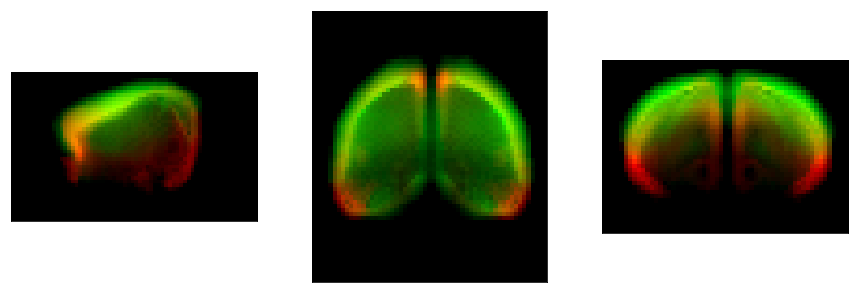

<Figure size 432x288 with 0 Axes>

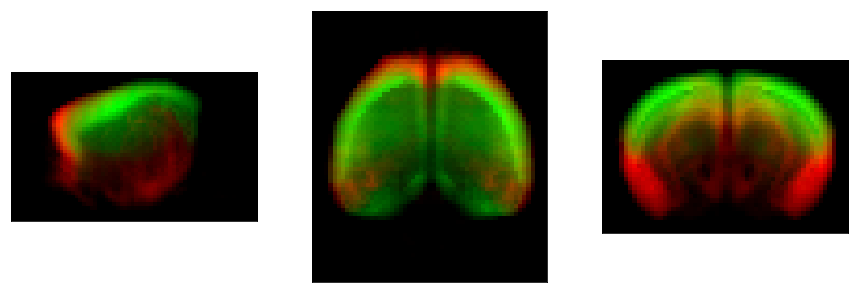

<Figure size 432x288 with 0 Axes>

In [107]:
for i in [5,7,6]:
    visualize_two_genes((PPs_3d[i, :, :, :]),(PPs_3d[0, :, :, :]), missing_mask=False)

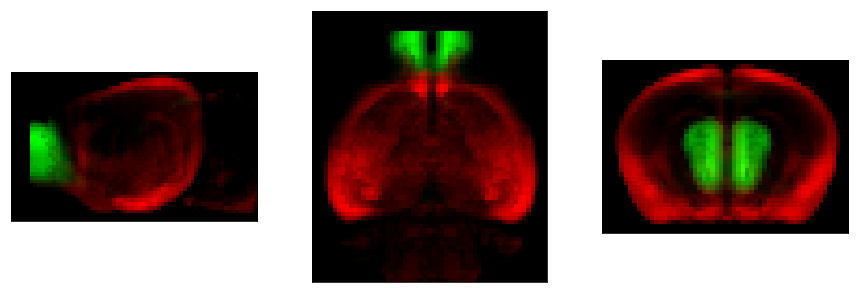

<Figure size 432x288 with 0 Axes>

In [108]:
visualize_two_genes((PPs_3d[12, :, :, :]),(PPs_3d[9, :, :, :]), missing_mask=False)

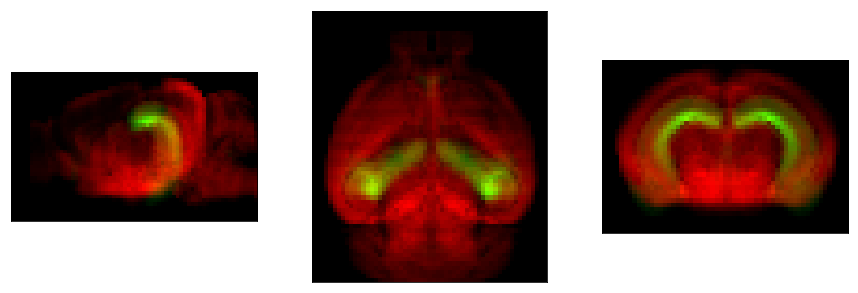

<Figure size 432x288 with 0 Axes>

In [109]:
visualize_two_genes((PPs_3d[10, :, :, :]),(PPs_3d[11, :, :, :]), missing_mask=False)

# pixel analysis

In [34]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data_original = tmp['data']
sections = tmp['sections'].item()
gene_ids = list(sections.keys())
original_shape = data_original.shape
# d = data.shape[1] * data.shape[2] * data.shape[3]
# data = np.reshape(data, (data.shape[0], d))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


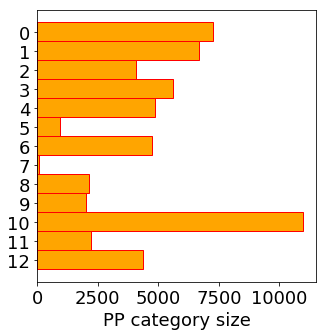

In [17]:
plt.figure(figsize=(5,5))
plt.hist(np.argmax(nmf.components_,axis=0),bins=np.arange(-.5,13.5,1),facecolor='orange',edgecolor='r',orientation='horizontal')
plt.yticks(np.arange(0,13))
plt.axis='off'
plt.gca().invert_yaxis()
plt.xlabel('PP category size')
plt.show()

In [18]:
gene_inds = []
for pp_ind in range(nmf.components_.shape[0]):
    gene_per_pp = np.where(np.argmax(nmf.components_,axis=0)==pp_ind)[0]
    gene_inds = np.concatenate((gene_inds, gene_per_pp))
gene_inds = gene_inds.astype(int)
D_sorted = nmf.components_[:,gene_inds]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


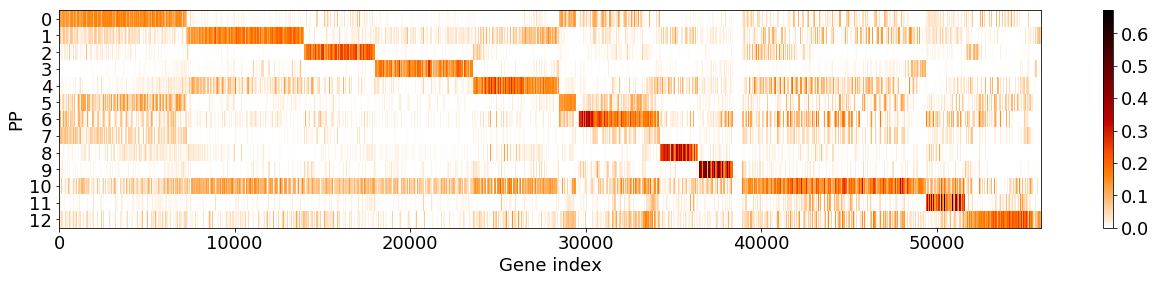

In [19]:
plt.figure(figsize=(22,4))
plt.imshow(D_sorted,interpolation='nearest', aspect='auto',cmap='gist_heat_r')
plt.yticks(np.arange(0,13))
plt.ylabel('PP')
plt.xlabel('Gene index')
plt.colorbar()

# marker genes

In [20]:
coeffs = nmf.transform(np.maximum(filtered_data,0))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


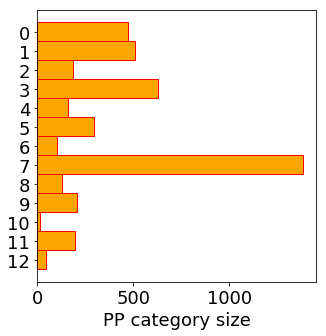

In [21]:
plt.figure(figsize=(5,5))
plt.hist(np.argmax(coeffs,axis=1),bins=np.arange(-.5,13.5,1),facecolor='orange',edgecolor='r',orientation='horizontal')
plt.yticks(np.arange(0,13))
plt.axis='off'
plt.gca().invert_yaxis()
plt.xlabel('PP category size')
plt.show()

In [22]:
gene_inds

array([ 3693,  3723,  4117, ..., 55951, 55952, 55953])

In [23]:
# sort based on loading
gene_inds = []
top_10_genes = np.zeros((coeffs.shape[1],10))

for pp_ind in range(coeffs.shape[1]):
    gene_per_pp = np.where(np.argmax(coeffs,axis=1)==pp_ind)[0]
    gene_per_pp_sorted = np.sort(coeffs[gene_per_pp,pp_ind])[::-1]
    gene_per_pp_arg_sort = np.argsort(coeffs[gene_per_pp,pp_ind])[::-1]
    gene_inds = np.concatenate((gene_inds, gene_per_pp[gene_per_pp_arg_sort]))
    top_10_genes[pp_ind,:] = gene_per_pp[gene_per_pp_arg_sort][:10]
gene_inds = gene_inds.astype(int)
coeffs_sorted = coeffs[gene_inds,:]

In [36]:
# sort based on amplitude score
gene_inds = []
top_10_genes = np.zeros((coeffs.shape[1],10))

for pp_ind in range(coeffs.shape[1]):
    gene_per_pp = np.where(np.argmax(coeffs,axis=1)==pp_ind)[0]
    amp_metric = coeffs[gene_per_pp,pp_ind]/np.sum(coeffs[gene_per_pp],axis=1)#+np.sum(coeffs[gene_per_pp,pp_ind+1:],axis=1))

#     gene_per_pp_sorted = np.sort(coeffs[gene_per_pp,pp_ind]/(np.sum(coeffs[gene_per_pp,:pp_ind])+np.sum(coeffs[gene_per_pp,pp_ind+1:])))[::-1]
    gene_per_pp_arg_sort = np.argsort(amp_metric)[::-1]
    gene_inds = np.concatenate((gene_inds, gene_per_pp[gene_per_pp_arg_sort]))
    top_10_genes[pp_ind,:] = gene_per_pp[gene_per_pp_arg_sort][:10]
gene_inds = gene_inds.astype(int)
coeffs_sorted = coeffs[gene_inds,:]

In [37]:
print(amp_metric)
print(gene_per_pp_arg_sort)

[0.21393758 0.15505366 0.13920169 0.29079752 0.28174474 0.34406908
 0.26409438 0.18583719 0.22865862 0.18673106 0.18019656 0.15133469
 0.19876079 0.28617282 0.22850999 0.34341062 0.27908774 0.24027983
 0.39509776 0.17095452 0.27873002 0.19811901 0.3505646  0.18789424
 0.23489034 0.18543173 0.24010481 0.24440417 0.15444295 0.20590725
 0.20843084 0.19622248 0.22068769 0.30128445 0.23205539 0.20512258
 0.1593875  0.1429989  0.18104534 0.14963561 0.2499616  0.20252551
 0.18440894 0.27898882 0.23831892 0.17086987 0.28041993 0.12980862
 0.20500195]
[18 22  5 15 33  3 13  4 46 16 43 20  6 40 27 17 26 44 24 34  8 14 32  0
 30 29 35 48 41 12 21 31 23  9  7 25 42 38 10 19 45 36  1 28 11 39 37  2
 47]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


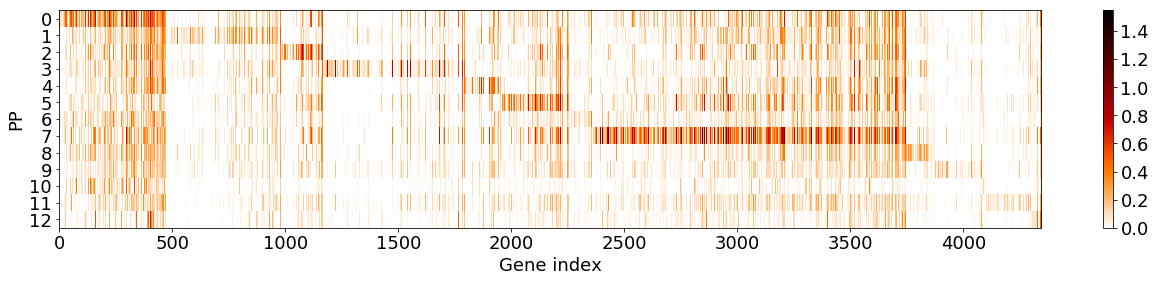

In [38]:
plt.figure(figsize=(22,4))
plt.imshow(coeffs_sorted.T,interpolation='nearest', aspect='auto',cmap='gist_heat_r')
plt.yticks(np.arange(0,13))
plt.ylabel('PP')
plt.xlabel('Gene index')
plt.colorbar()

0
4283
4134
1745
1
1707
860
1682
2
3082
1937
1013
3
4032
2600
2763
4
5
1337
3680
5
3408
2504
710
6
342
1493
1249
7
1846
620
2409
8
3782
1656
2834
9
3083
3023
3090
10
1140
2202
868
11
3094
3014
405


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


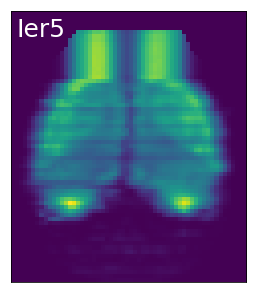

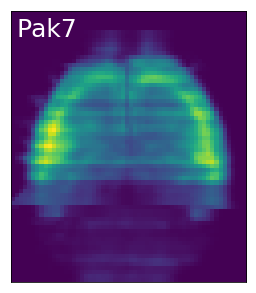

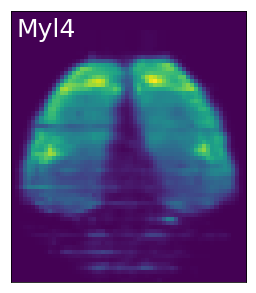

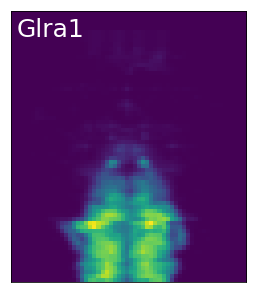

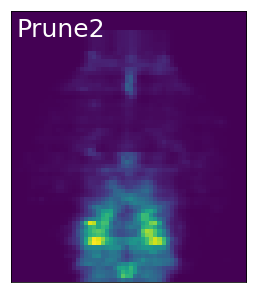

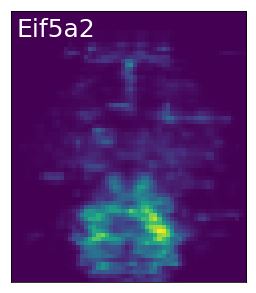

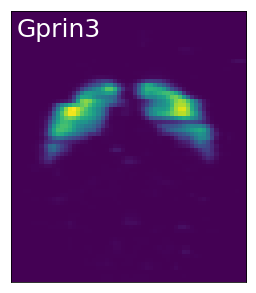

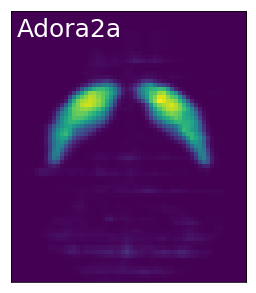

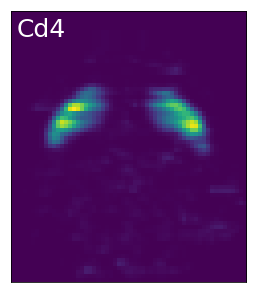

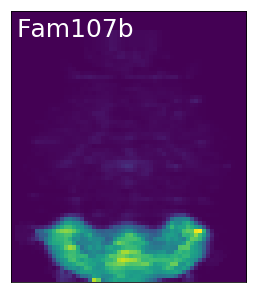

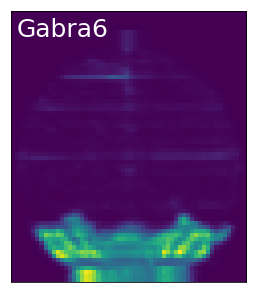

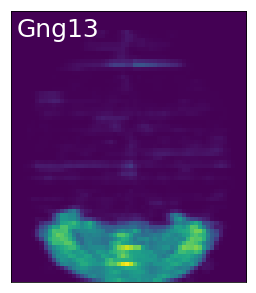

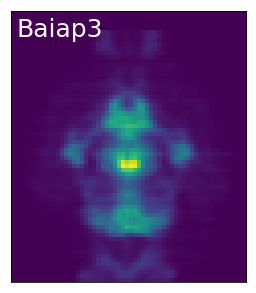

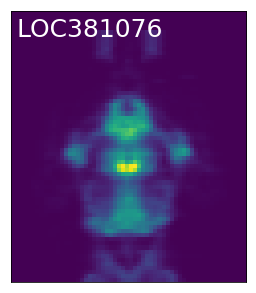

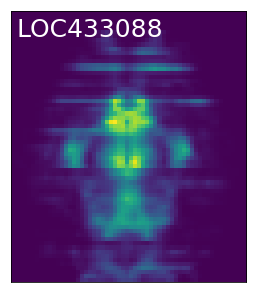

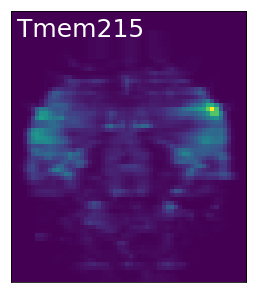

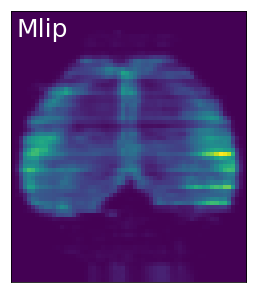

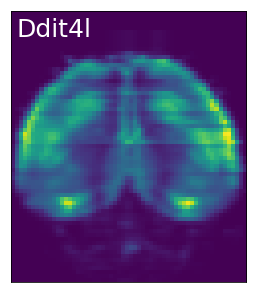

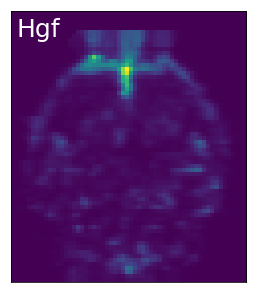

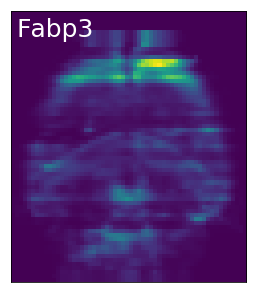

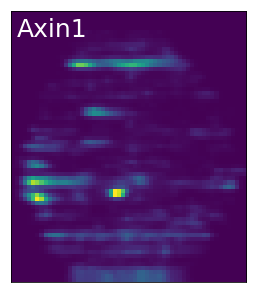

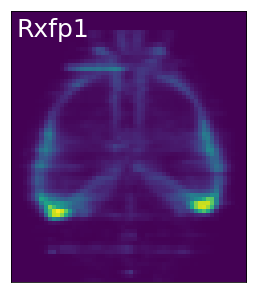

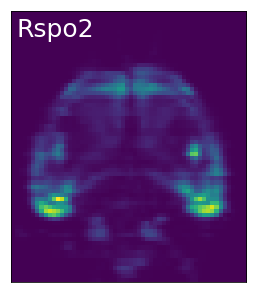

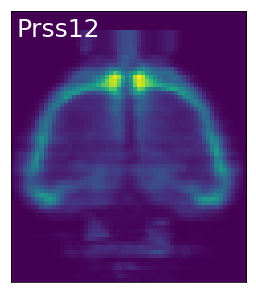

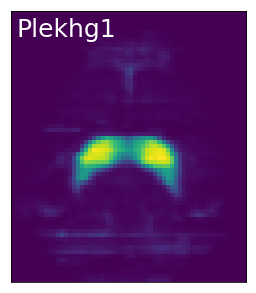

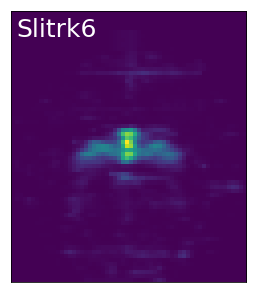

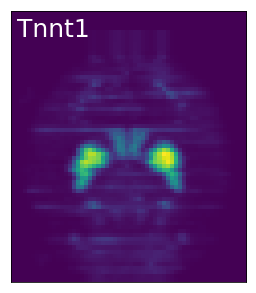

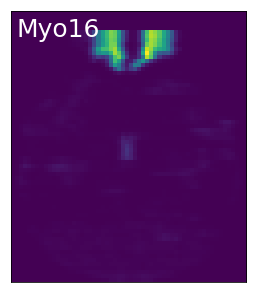

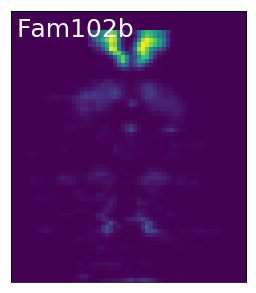

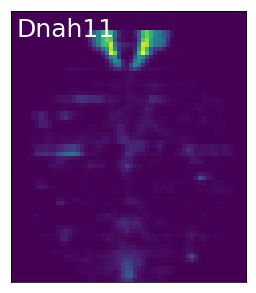

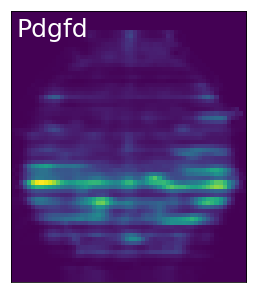

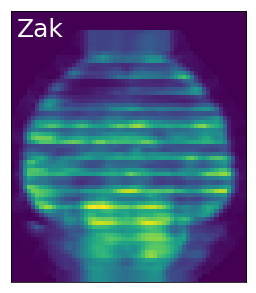

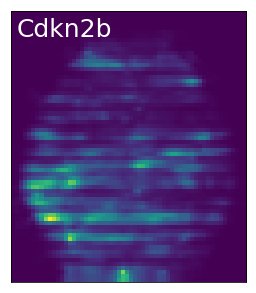

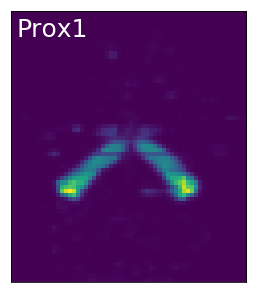

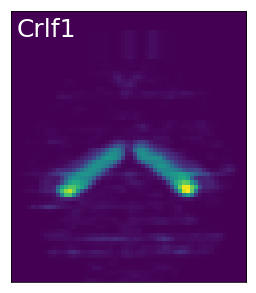

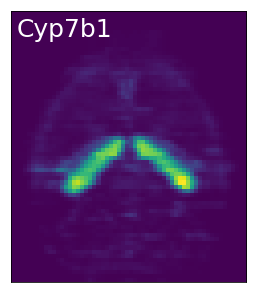

In [39]:
#visualize genes

for pp_ind in range(12):
    print(pp_ind)
    for gene_rank in range(3):
#         _, (a, b, c) = plt.subplots(1, 3, figsize=(15, 5))
#         gene_ind = top_10_genes[pp_ind, gene_rank].astype(int)
#         print(gene_ind)
#         a.imshow(np.mean(np.maximum(data[gene_ind, :, :, :],0), 2).T)
#         b.imshow(np.mean(np.maximum(data[gene_ind, :, :, :],0), 1))
#         c.imshow(np.mean(np.maximum(data[gene_ind, :, :, :],0), 0))
#         a.text(1, 6, [name for x, name in sections.items() if x ==  gene_ids[gene_ind]][0], color='w', fontsize=25)
#         b.text(1, 6, [name for x, name in sections.items() if x ==  gene_ids[gene_ind]][0], color='w', fontsize=25)
#         c.text(1, 6, [name for x, name in sections.items() if x ==  gene_ids[gene_ind]][0], color='w', fontsize=25)
#         a.axes.get_xaxis().set_visible(False)
#         a.axes.get_yaxis().set_visible(False)
#         b.axes.get_xaxis().set_visible(False)
#         b.axes.get_yaxis().set_visible(False)
#         c.axes.get_xaxis().set_visible(False)
#         c.axes.get_yaxis().set_visible(False)
        _, (b) = plt.subplots(1, 1, figsize=(5, 5))
        gene_ind = top_10_genes[pp_ind, gene_rank].astype(int)
        print(gene_ind)
        b.imshow(np.mean(np.maximum(data[gene_ind, :, :, :],0), 1))
        b.text(1, 6, [name for x, name in sections.items() if x ==  gene_ids[gene_ind]][0], color='w', fontsize=25)
        b.axes.get_xaxis().set_visible(False)
        b.axes.get_yaxis().set_visible(False)

# compute networks

In [46]:
def filter_genes(coefs, pps, threshold = .99):
    large_coefs = np.max(coefs[:, pps], 1) / np.sum(coefs, 1)
    return large_coefs > np.quantile(large_coefs, threshold)

In [47]:
def weighted_correlation(A, weights, demean=True):
    '''
    Compute the weighted correlation between columns of A using the weights.
    '''
    if demean:
        A = A - np.mean(A, 0, keepdims=True)
    mean_A = 0#np.sum(A * weights, 1, keepdims=True) / np.sum(weights)
    cov = (A - mean_A) @ (A - mean_A).T
    corr = np.diag(np.diag(cov) ** -.5) @ cov @ np.diag(np.diag(cov)**-.5)
    return corr

In [40]:
unique_gene_names = np.unique(list(sections.values()))

unique_X = np.zeros((len(unique_gene_names), filtered_data.shape[1]))

for ind, name in enumerate(unique_gene_names):
    gene_ids = np.where([x == name for x in sections.values()])[0]
    #print(gene_ids)
    unique_X[ind,:] = np.mean(filtered_data[gene_ids,:], 0)

In [44]:
# solve the coefs
unique_coefs = nmf.transform(np.maximum(unique_X, 0))

# correlation network

In [55]:
np.sum(selected_gene_ids)

41

In [74]:
import scipy

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


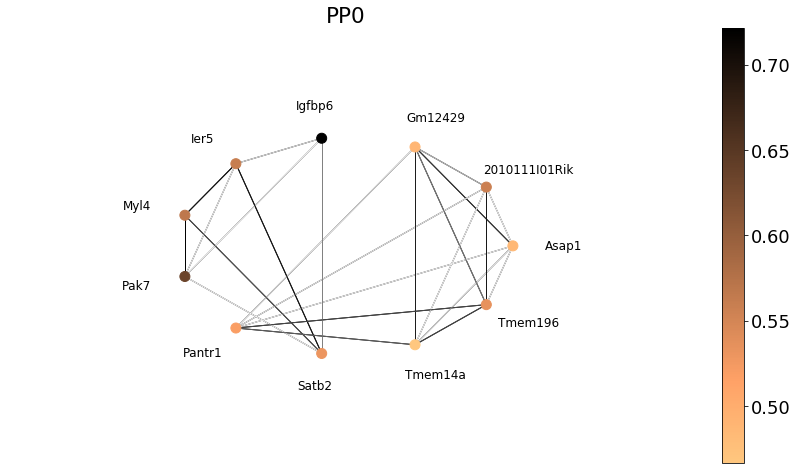

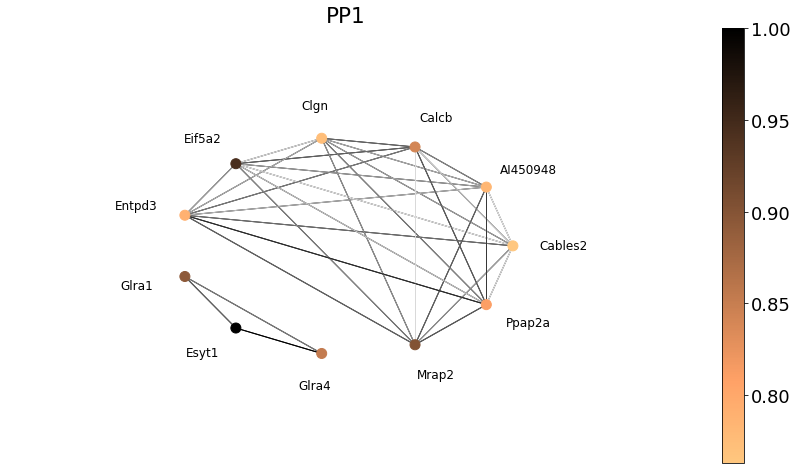

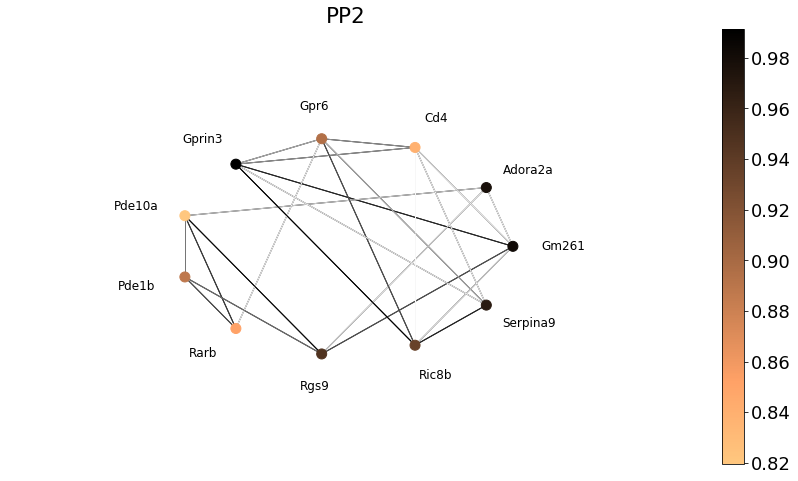

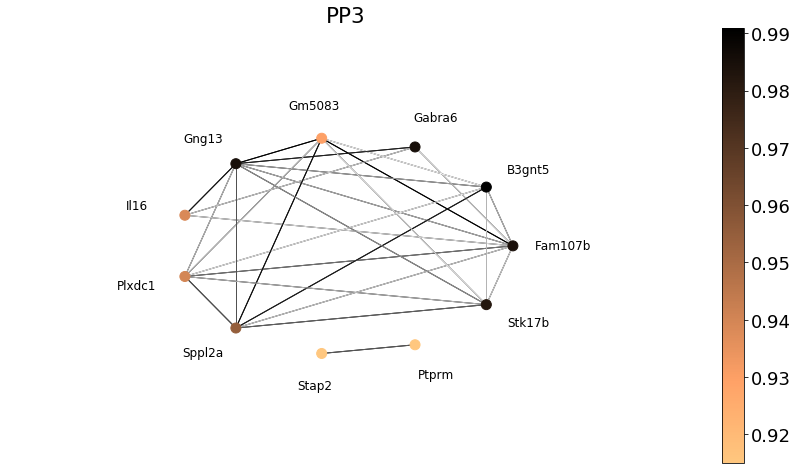

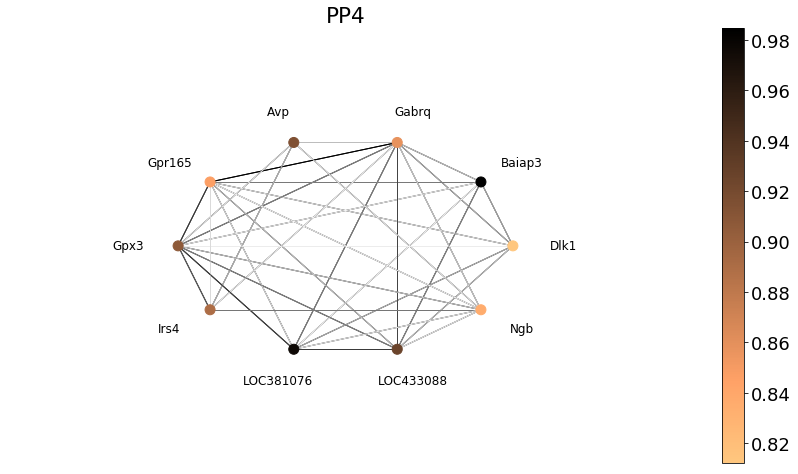

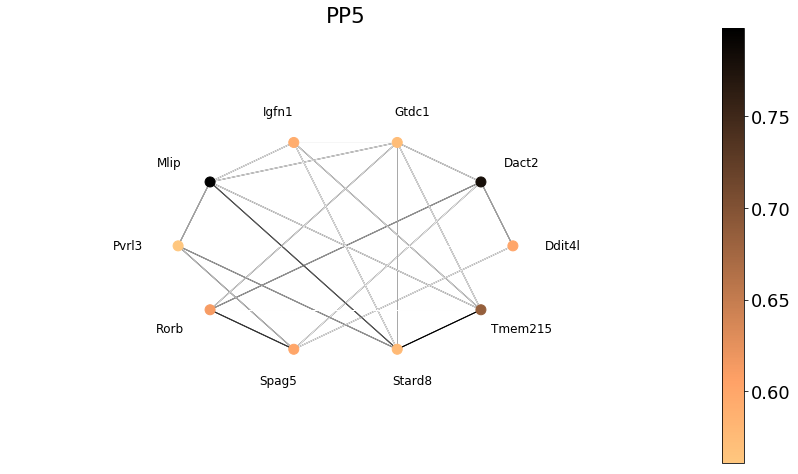

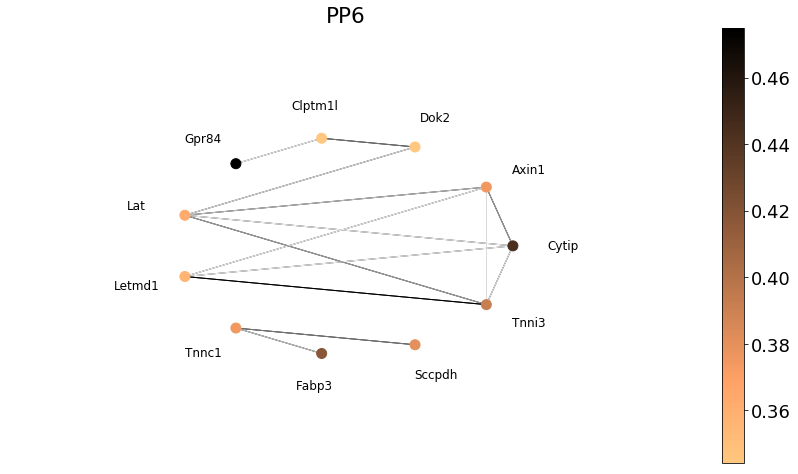

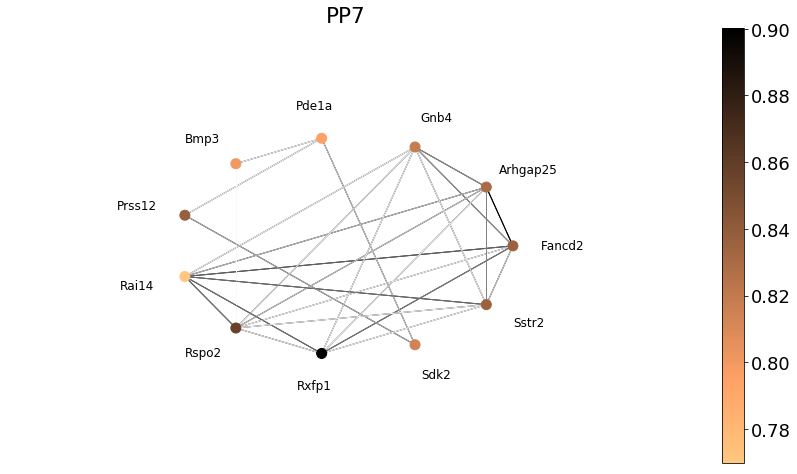

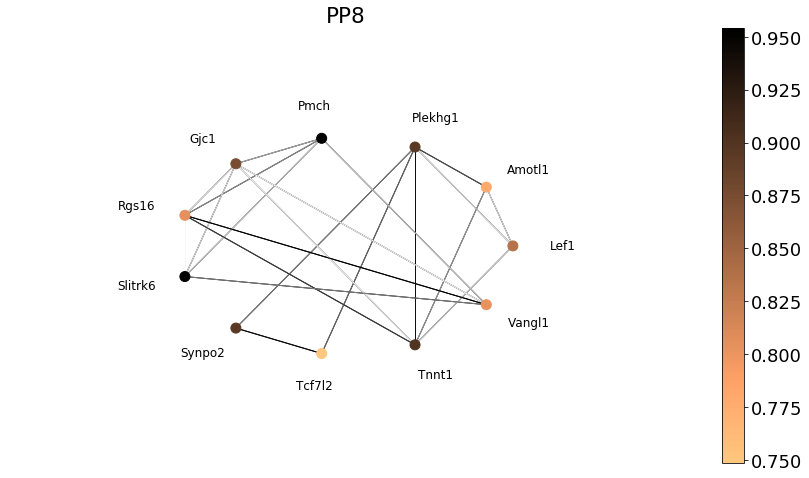

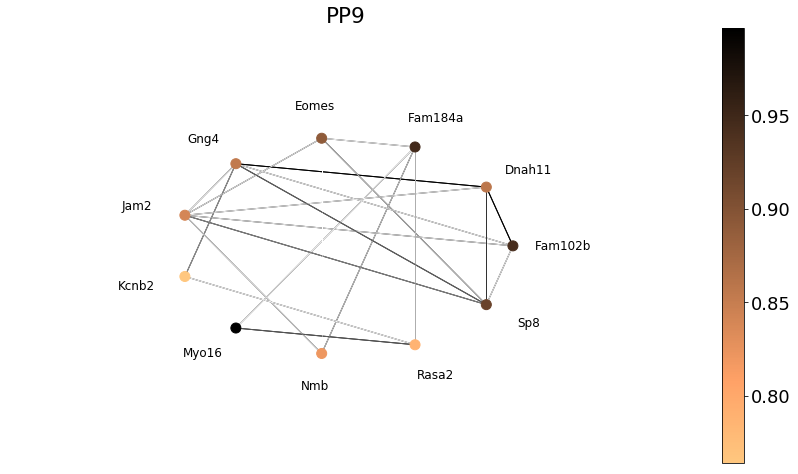

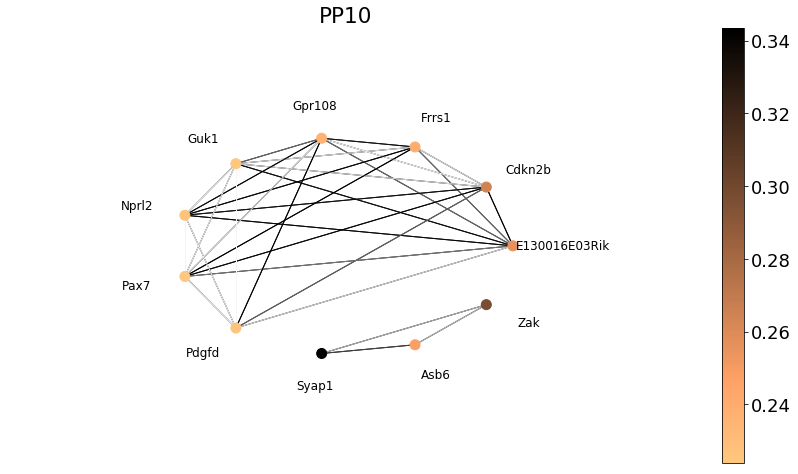

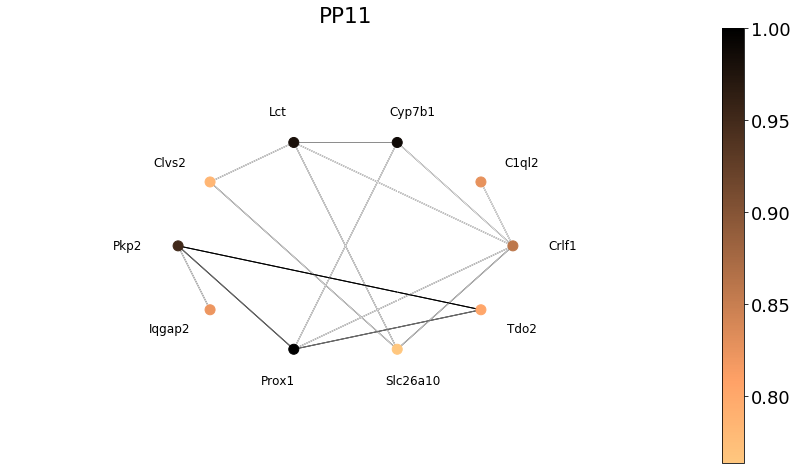

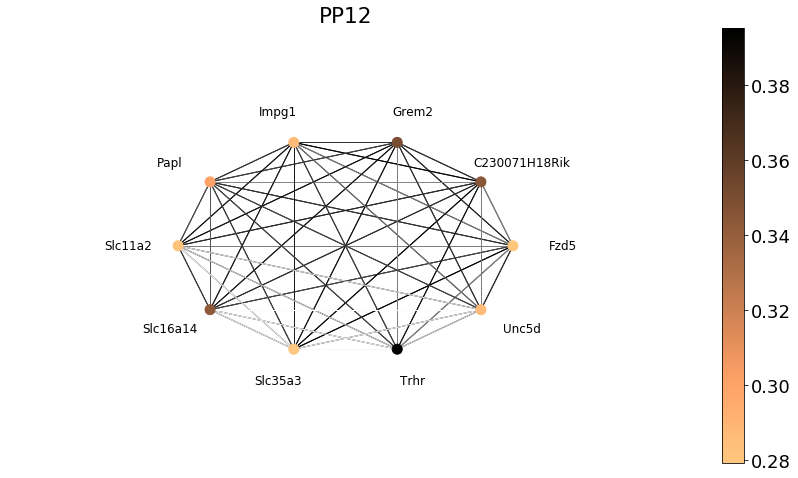

In [73]:
## pps = [16, 14, 6]
#pps = [5, 13, 12]
#pps = [4,8,9]
#pps = [0, 6, 8, 9, 12, 14, 15]
for i in range(13):
    pps = [i]
    weights = np.mean(nmf.components_[pps], 0)
    selected_gene_ids = filter_genes(unique_coefs, pps, threshold=0.9975)
    correlations = weighted_correlation(unique_X[selected_gene_ids,:], weights, demean=True)
    #correlations = np.corrcoef(X_guess[selected_gene_ids,:] * weights ** .5) 
    selected_gene_names = unique_gene_names[selected_gene_ids]
    colors = (
        unique_coefs[selected_gene_ids, pps[0]]/
        np.sum(unique_coefs[selected_gene_ids], axis=1)
    )
    upper_bound = 0 #np.percentile(correlations.flatten(), 0)
    adj_matrix = correlations #> upper_bound
    adj_matrix[correlations <= upper_bound] = 0
    show_graph_with_labels(adj_matrix, {ind: name for ind, name in enumerate(selected_gene_names)}, 
                       colors=colors,title="PP{}".format(i))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


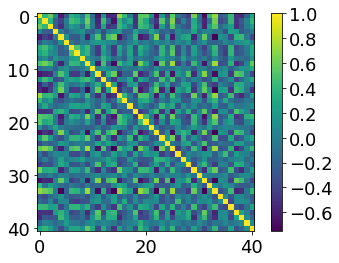

In [565]:
plt.imshow(correlations)
plt.colorbar()
plt.show()

In [652]:
import networkx as nx
upper_bound = np.percentile(correlations.flatten(), 95)
adj_matrix = correlations #> upper_bound
adj_matrix[correlations <= upper_bound] = 0
#adj_matrix = 0
print(upper_bound)

0.8340289585424353


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


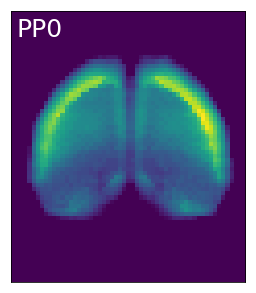

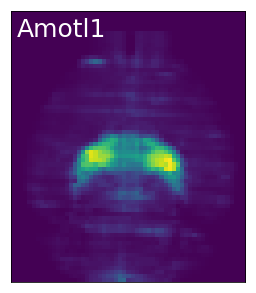

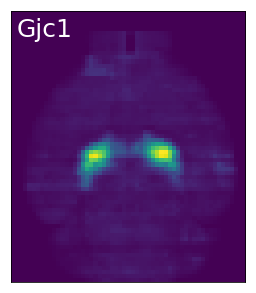

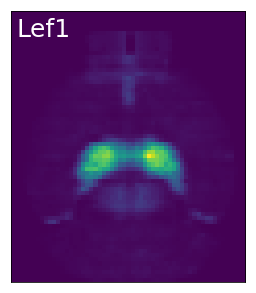

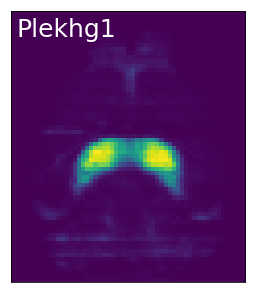

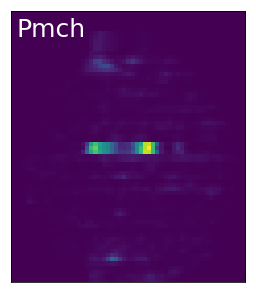

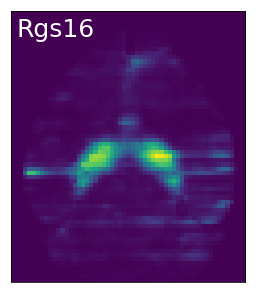

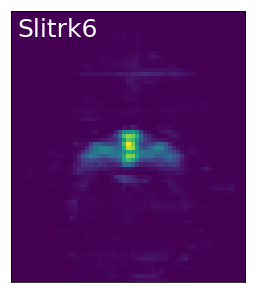

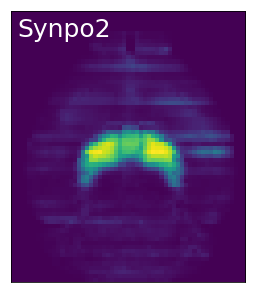

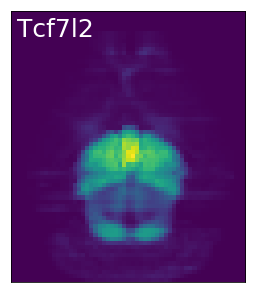

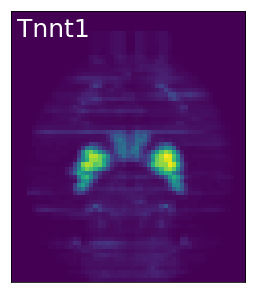

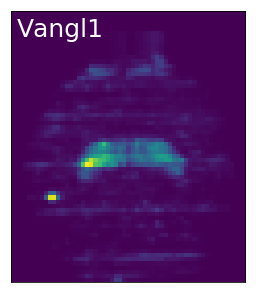

In [72]:
#visualize genes
selected_gene_ids = filter_genes(unique_coefs, [8], threshold=0.9975)
_, (b) = plt.subplots(1, 1, figsize=(5, 5))
b.imshow(np.mean(np.maximum(PPs_3d[0, :, :, :],0), 1))
b.text(1, 6, "PP0", color='w', fontsize=25)
b.axes.get_xaxis().set_visible(False)
b.axes.get_yaxis().set_visible(False)
baseline = 0 #np.mean(unique_X[selected_gene_ids], 0)
for gene_ind in np.where(selected_gene_ids)[0]:
    _, (b) = plt.subplots(1, 1, figsize=(5, 5))
    tmp = np.zeros((66, 40, 57))
    tmp[support] = unique_X[gene_ind] - baseline
    b.imshow(np.mean(np.maximum(tmp,0), 1))
    b.text(1, 6, unique_gene_names[gene_ind], color='w', fontsize=25)
    b.axes.get_xaxis().set_visible(False)
    b.axes.get_yaxis().set_visible(False)

In [49]:
def show_graph_with_labels(adjacency_matrix, mylabels, colors,title=""):
    plt.figure(figsize=(15,8))
    rows, cols = np.where(adjacency_matrix > 0)
    edges = [(x, y) for x, y in zip(rows.tolist(), cols.tolist()) if x > y]
    edge_colors = np.array([adjacency_matrix[edge[0], edge[1]] for edge in edges])
    gr = nx.Graph()
    gr.add_edges_from(edges)
    
    remove = [node for node,degree in gr.degree() if degree <= 0.5]
    colors = [x for x, y in zip(colors, gr.degree()) if y[1] > 0.5]
    edge_colors = [y for x, y in zip(edges, edge_colors) if gr.degree()[x[0]] > 0.5 and gr.degree()[x[1]] > 0.5]
    
    gr.remove_nodes_from(remove)
    nodes = set(ind for ind, name in gr.degree())
    pos = nx.circular_layout(gr)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    nx.draw(
        gr,
        pos,
        node_size=100,
        labels={k:v for k, v in mylabels.items() if k in gr},
        node_color=colors,
        with_labels=False,
        cmap=plt.cm.copper_r,
    )
    nx.draw_networkx_edges(
        gr,
        pos,
        gr.edges(),
        edge_color=edge_colors,
        edge_cmap=plt.cm.Greys,
    )
    description = nx.draw_networkx_labels(gr,{k:(v[0] * 1.3, v[1] * 1.3) for k, v in pos.items()},labels={k:v for k, v in mylabels.items() if k in gr})
    sm = plt.cm.ScalarMappable(cmap=plt.cm.copper_r, norm=plt.Normalize(vmin = np.min(colors), vmax=np.max(colors)))
    sm._A = []
    plt.colorbar(sm)
    plt.title(title)
    plt.savefig("network_{}.png".format(title))
    plt.show()

# irf`

In [720]:
import importlib

In [721]:
irf

<module 'irf' from '/home/ubuntu/github/irf/irf/__init__.py'>